In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
import glob

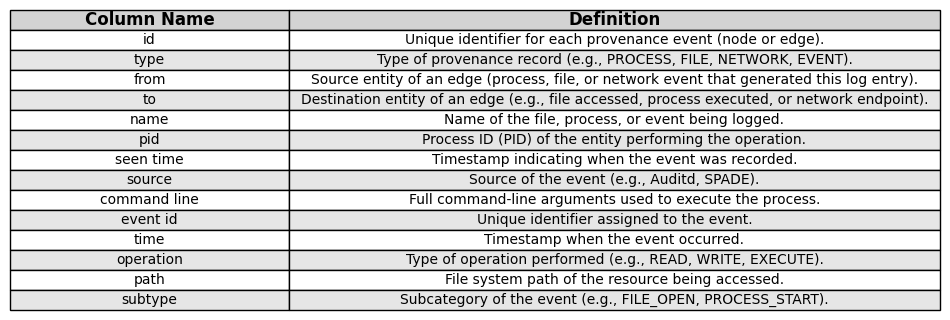

In [85]:

import matplotlib.table as tbl
 # Adjust the width (15) as needed

# Define table data
data = [
    ["id", "Unique identifier for each provenance event (node or edge)."],
    ["type", "Type of provenance record (e.g., PROCESS, FILE, NETWORK, EVENT)."],
    ["from", "Source entity of an edge (process, file, or network event that generated this log entry)."],
    ["to", "Destination entity of an edge (e.g., file accessed, process executed, or network endpoint)."],
    ["name", "Name of the file, process, or event being logged."],
    ["pid", "Process ID (PID) of the entity performing the operation."],
    ["seen time", "Timestamp indicating when the event was recorded."],
    ["source", "Source of the event (e.g., Auditd, SPADE)."],
    ["command line", "Full command-line arguments used to execute the process."],
    ["event id", "Unique identifier assigned to the event."],
    ["time", "Timestamp when the event occurred."],
    ["operation", "Type of operation performed (e.g., READ, WRITE, EXECUTE)."],
    ["path", "File system path of the resource being accessed."],
    ["subtype", "Subcategory of the event (e.g., FILE_OPEN, PROCESS_START)."],
]


df = pd.DataFrame(data, columns=["Column Name", "Definition"])

# Create figure
fig, ax = plt.subplots(figsize=(12, len(df) * 0.20))
ax.axis("tight")
ax.axis("off")

# Create table
table = tbl.table(ax, cellText=df.values, colLabels=df.columns, cellLoc="center", loc="center")

# Set font size and weight
table.auto_set_font_size(False)
table.set_fontsize(10)  # Change font size here
table.scale(1.2, 1.2)

# Adjust column widths
col_widths = [0.3, 0.7]  # Shrink "Column Name" and expand "Definition"
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    
    # Apply bold font to header row
    if key[0] == 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#D3D3D3')  # Header background color (gray)
    
    # Alternate row colors
    elif key[0] > 0:
        cell.set_facecolor(row_colors[key[0] % 2])
    
    # Adjust column widths
    if key[1] == 0:  # "Column Name"
        cell.set_width(col_widths[0])
    elif key[1] == 1:  # "Definition"
        cell.set_width(col_widths[1])

# Save table as image
plt.savefig("styled_table.png", dpi=300, bbox_inches="tight")

# Show table
plt.show()

In [77]:

df = pd.read_csv('/Users/samuel/SHES/2024_Provenance/Phase1_Provenance.csv')


df['id'] = df['id'].replace('', None).fillna(method='ffill')


df['to'] = df['to'].replace('', None)
df['from'] = df['from'].replace('', None)

empty_rows = df['from'].isna() & df['to'].isna()

distance_to_next = empty_rows[::-1].cumsum()[::-1] - empty_rows.cumsum()

df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


df.to_csv('Phase1_Provenance_Cleaned.csv', index=False)

print("File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'")

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/2660945238.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id'] = df['id'].replace('', None).fillna(method='ffill')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/2660945238.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/2660945238.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'


In [78]:
df.columns

Index(['id', 'type', 'from', 'to', 'uid', 'egid', 'exe', 'gid', 'euid', 'name',
       'pid', 'seen time', 'source', 'ppid', 'command line', 'start time',
       'event id', 'time', 'operation', 'path', 'subtype', 'permissions',
       'epoch', 'version', 'flags', 'local address', 'remote port', 'protocol',
       'remote address', 'local port', 'tgid', 'fd', 'mode', 'label',
       'subLabel'],
      dtype='object')

In [38]:

df = pd.read_csv('/Users/samuel/SHES/2024_Provenance/Phase2_Provenance.csv')


df['id'] = df['id'].replace('', None).fillna(method='ffill')


df['to'] = df['to'].replace('', None)
df['from'] = df['from'].replace('', None)

empty_rows = df['from'].isna() & df['to'].isna()

distance_to_next = empty_rows[::-1].cumsum()[::-1] - empty_rows.cumsum()

df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
df['from'] = df['from'].fillna(method='bfill', limit=int(distance_to_next.max()))


df.to_csv('Phase2_Provenance_Cleaned.csv', index=False)

print("File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'")

df_attack = df

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/828718557.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/samuel/SHES/2024_Provenance/Phase2_Provenance.csv')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/828718557.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['id'] = df['id'].replace('', None).fillna(method='ffill')
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/828718557.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['to'] = df['to'].fillna(method='bfill', limit=int(distance_to_next.max()))
/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/828718557.py:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future

File has been cleaned and saved as 'Phase1_Provenance_Cleaned.csv'


In [39]:
df_attack

id            type  \
0       ca5b322fa4d4cb63aa5dd9fbd88e37e4         Process   
1       e36715b62c8cdc32e47483b3600712f1         Process   
2       e36715b62c8cdc32e47483b3600712f1  WasTriggeredBy   
3       216f4d4893942a66d649c4e02b5722c4        Artifact   
4       216f4d4893942a66d649c4e02b5722c4            Used   
...                                  ...             ...   
196730  e97a4f8ea72d1ccbbd9a4fd26692c38e         Process   
196731  e97a4f8ea72d1ccbbd9a4fd26692c38e  WasTriggeredBy   
196732  12b6df6ce5e36fc5608f5c2d916718ae        Artifact   
196733  12b6df6ce5e36fc5608f5c2d916718ae            Used   
196734  12b6df6ce5e36fc5608f5c2d916718ae            Used   

                                    from                                to  \
0       e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4   
1       e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4   
2       e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4   
3       e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4   
4       e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4   
...                                  ...                               ...   
196730  e97a4f8ea72d1ccbbd9a4fd26692c38e  cc3aa5736c336ef1edaa2d2c54191f8e   
196731  e97a4f8ea72d1ccbbd9a4fd26692c38e  cc3aa5736c336ef1edaa2d2c54191f8e   
196732  e97a4f8ea72d1ccbbd9a4fd26692c38e  12b6df6ce5e36fc5608f5c2d916718ae   
196733  e97a4f8ea72d1ccbbd9a4fd26692c38e  12b6df6ce5e36fc5608f5c2d916718ae   
196734  e97a4f8ea72d1ccbbd9a4fd26692c38e  02a4195a9866b7c9eba7405c13110dad   

        uid  egid                                      exe  gid  euid  \
0       0.0   0.0                            /usr/bin/dash  0.0   0.0   
1       0.0   0.0                            /usr/bin/dash  0.0   0.0   
2       NaN   NaN                                      NaN  NaN   NaN   
3       NaN   NaN                                      NaN  NaN   NaN   
4       NaN   NaN                                      NaN  NaN   NaN   
...     ...   ...                                      ...  ...   ...   
196730  0.0   0.0  /usr/bin/systemd-tty-ask-password-agent  0.0   0.0   
196731  NaN   NaN                                      NaN  NaN   NaN   
196732  NaN   NaN                                      NaN  NaN   NaN   
196733  NaN   NaN                                      NaN  NaN   NaN   
196734  NaN   NaN                                      NaN  NaN   NaN   

                   name  ...  local address  remote port protocol  \
0               ethtool  ...            NaN          NaN      NaN   
1               ethtool  ...            NaN          NaN      NaN   
2                   NaN  ...            NaN          NaN      NaN   
3                   NaN  ...            NaN          NaN      NaN   
4                   NaN  ...            NaN          NaN      NaN   
...                 ...  ...            ...          ...      ...   
196730  systemd-tty-ask  ...            NaN          NaN      NaN   
196731              NaN  ...            NaN          NaN      NaN   
196732              NaN  ...            NaN          NaN      NaN   
196733              NaN  ...            NaN          NaN      NaN   
196734              NaN  ...            NaN          NaN      NaN   

        remote address local port  tgid  fd  mode label subLabel  
0                  NaN        NaN   NaN NaN   NaN     0        0  
1                  NaN        NaN   NaN NaN   NaN     0        0  
2                  NaN        NaN   NaN NaN   NaN     0        0  
3                  NaN        NaN   NaN NaN   NaN     0        0  
4                  NaN        NaN   NaN NaN   NaN     0        0  
...                ...        ...   ...  ..   ...   ...      ...  
196730             NaN        NaN   NaN NaN   NaN     0        0  
196731             NaN        NaN   NaN NaN   NaN     0        0  
196732             NaN        NaN   NaN NaN   NaN     0        0  
1967

In [15]:
df_combined = pd.concat(map(pd.read_csv, ['Phase1_Provenance_Cleaned.csv', 'Phase2_Provenance_Cleaned.csv']), ignore_index=True)


/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/3060278382.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.concat(map(pd.read_csv, ['Phase1_Provenance_Cleaned.csv', 'Phase2_Provenance_Cleaned.csv']), ignore_index=True)


In [16]:
to_look  = ['source', 'command line', 'exe', 'event id', 'time', 'epoch', 'protocol', 'remote port']
filtered_df = df[to_look]
filtered_df

source                                 command line  \
0       syscall                                          NaN   
1       syscall         /bin/sh /etc/network/if-up.d/ethtool   
2       syscall                                          NaN   
3       syscall                                          NaN   
4       syscall                                          NaN   
...         ...                                          ...   
196730  syscall  /bin/systemd-tty-ask-password-agent --watch   
196731  syscall                                          NaN   
196732  syscall                                          NaN   
196733  syscall                                          NaN   
196734  syscall                                          NaN   

                                            exe  event id          time  \
0                                 /usr/bin/dash       NaN           NaN   
1                                 /usr/bin/dash       NaN           NaN   
2                                           NaN     246.0  1.701469e+09   
3                                           NaN       NaN           NaN   
4                                           NaN     246.0  1.701469e+09   
...                                         ...       ...           ...   
196730  /usr/bin/systemd-tty-ask-password-agent       NaN           NaN   
196731                                      NaN  404003.0  1.701728e+09   
196732                                      NaN       NaN           NaN   
196733                                      NaN  404003.0  1.701728e+09   
196734                                      NaN  404003.0  1.701728e+09   

        epoch protocol  remote port  
0         NaN      NaN          NaN  
1         NaN      NaN          NaN  
2         NaN      NaN          NaN  
3         0.0      NaN          NaN  
4         NaN      NaN          NaN  
...       ...      ...          ...  
196730    NaN      NaN          NaN  
196731    NaN      NaN          NaN  
196732    0.0      NaN          NaN  
196733    NaN      NaN          NaN  
196734    NaN      NaN          NaN  

[196735 rows x 8 columns]

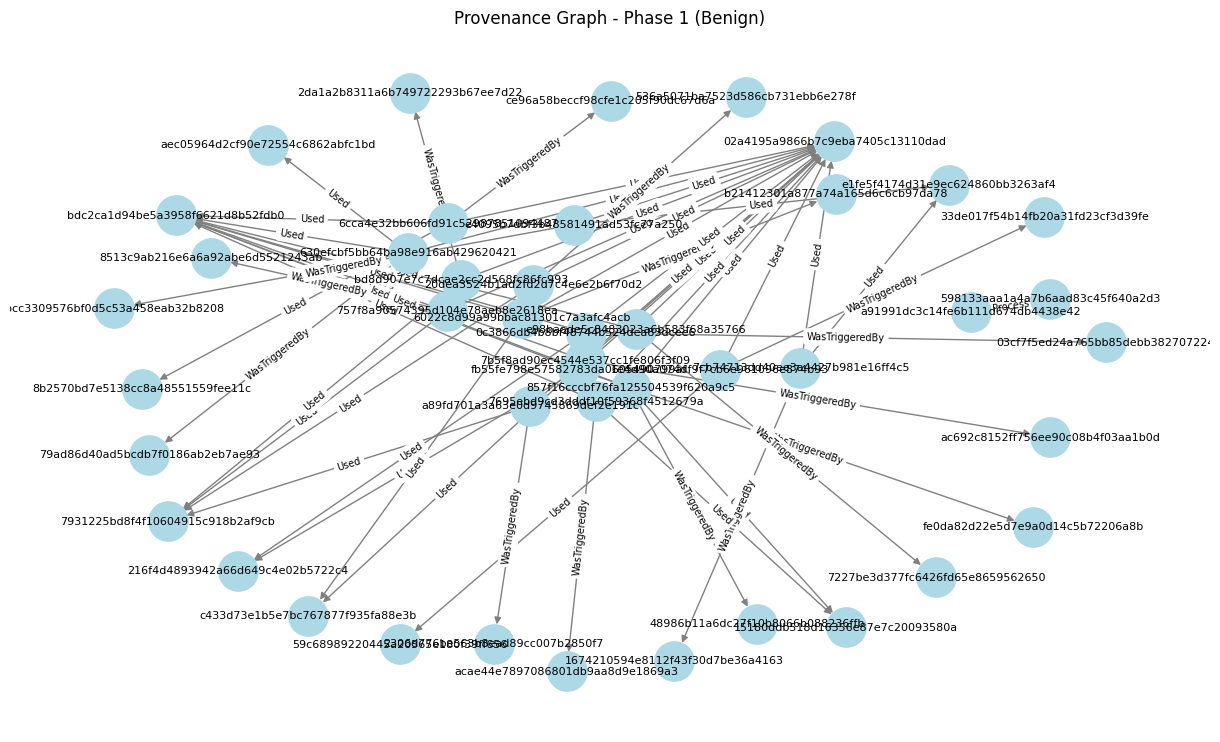

In [17]:
import networkx as nx

df = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:100]
df = df.fillna('')

G = nx.DiGraph()


for _, row in df.iterrows():
    G.add_node(row["from"], label=row["type"]) 
    G.add_node(row["to"], label=row["type"])   
    G.add_edge(row["from"], row["to"], label=row["type"])  

# Visualize the graph
plt.figure(figsize=(12, 7))
pos = nx.spring_layout(G, seed=42)

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)


edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Provenance Graph - Phase 1 (Benign)")
plt.show()

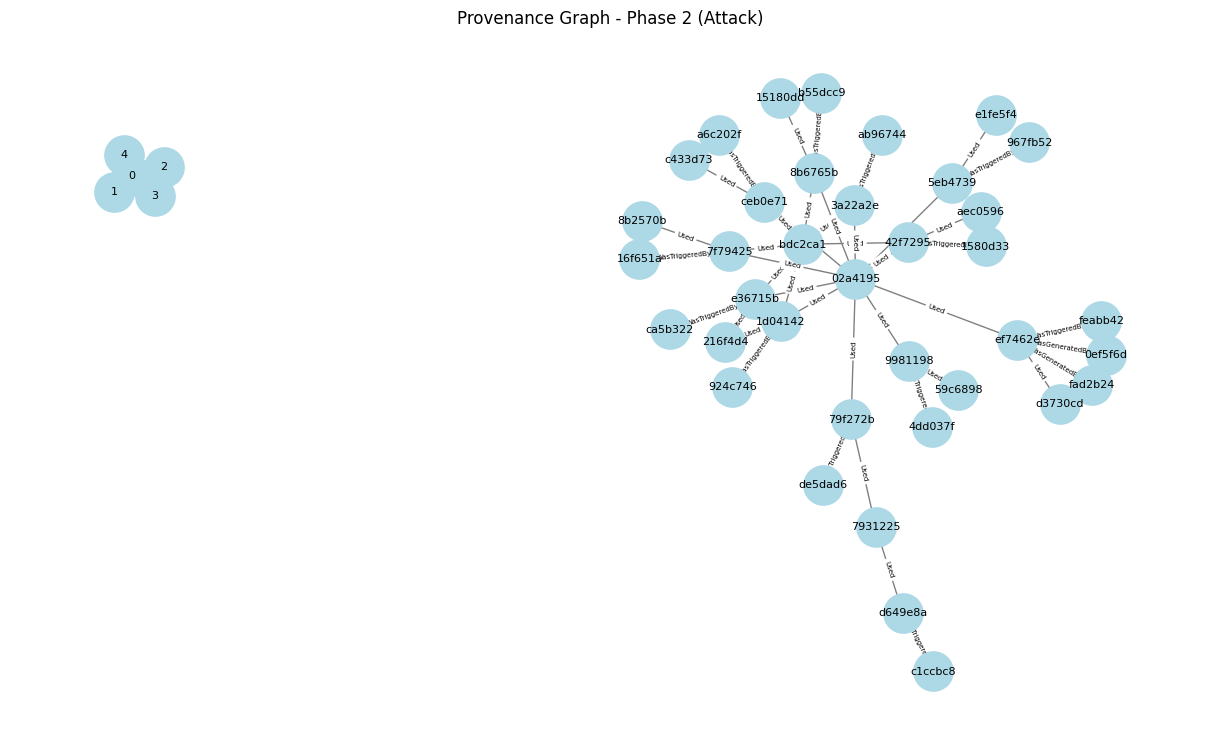

In [173]:
import networkx as nx


dtype_mapping = {
    'flags': str,  
    'protocol': str,  
    'sublabel': int 
}

df = pd.read_csv("Phase2_Provenance_Cleaned.csv", dtype=dtype_mapping, low_memory = False)[0:80]
df = df.fillna('')

G = nx.complete_graph(5)



for _, row in df.iterrows():
    G.add_node(row["from"], label=row["type"]) 
    G.add_node(row["to"], label=row["type"])   
    G.add_edge(row["from"], row["to"], label=row["type"])  

# Visualize the graph
plt.figure(figsize=(12, 7))

mapping = {node: str(node)[:7] for node in G.nodes()}
G = nx.relabel_nodes(G, mapping)

pos = nx.spring_layout(G, seed = 43)

nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)


# tuple_list = []
# for i in edge_labels:
#     tuple = (i[0][:4],i[1][:4])
#     tuple_list.append(tuple)


# edge_label_list = list(edge_labels.items())


# for i in range(len(tuple_list)):
#    edge_label_list[i] = (tuple_list[i],edge_label_list[i][1])

# edge_lables = dict(edge_label_list)
# edge_lables

edge_labels = nx.get_edge_attributes(G, "label")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("Provenance Graph - Phase 2 (Attack)")
plt.show()

### Assign weights based on event frequency and detect rare but significant events

In [18]:
df = pd.read_csv("Phase1_Provenance_Cleaned.csv")
df = df.fillna('')

G = nx.DiGraph()

for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type = event_type)

#Frequently occurred events
high_weight_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
print("Top weighted edges (frequently occurring events):", high_weight_edges)

#rare/anomal eventsΩ
rare_events = [(u, v, d) for u, v, d in G.edges(data=True) if d["event_type"] == "PrivilegeEscalation"]
print("Rare but significant events:", rare_events)

Top weighted edges (frequently occurring events): [('cd0813274ef046cf6ef72a2349f2bef3', 'dd92fe204ef9671aa2d023b5d3b214a8', {'weight': 18889, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '8ba1082bd7d385ba25e5c3e70dc998c4', {'weight': 16296, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '01a78ea0003ea00791315d72301e7422', {'weight': 13930, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'acc78d38a6778183865533d690f24112', {'weight': 12015, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '7405697383da5aa06083fef098e40d82', {'weight': 10025, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '068368628cb430b65d5277c259de7507', {'weight': 7953, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'f2268c214d8f3ec89910e3bbd539a030', {'weight': 6683, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '5fadefce0701c7c4fb86f8584cecc449', {'weight': 6504, 'event_type': 'Process'}), ('cd0813

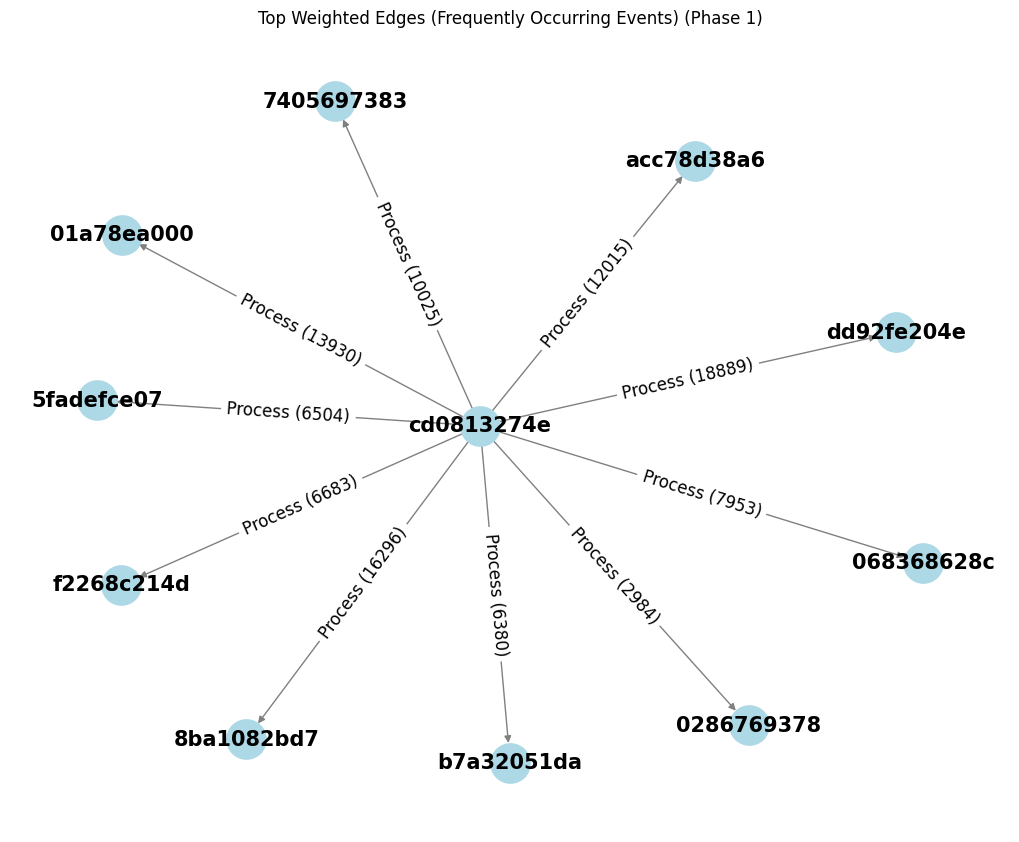

In [83]:
G = nx.DiGraph()
for u, v, d in high_weight_edges:
    G.add_edge(u, v, weight=d['weight'], event_type=d['event_type'])

# Generate positions for the nodes
pos = nx.spring_layout(G, seed=42)

# Shorten node labels
shorten_labels = {node: node[:10] for node in G.nodes()}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, labels=shorten_labels, with_labels=True, node_color="lightblue",
    edge_color="gray", node_size=800, font_size=15, font_weight="bold"
)

# Add edge labels to show both weight and type
edge_labels = {
    (u, v): f"{d['event_type']} ({d['weight']})"
    for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Top Weighted Edges (Frequently Occurring Events) (Phase 1)")
plt.show()

In [19]:
event_types = [d['event_type'] for _, _, d in G.edges(data=True)]
from collections import Counter
event_type_counts = Counter(event_types)
print("Event type counts:", event_type_counts)

Event type counts: Counter({'Artifact': 36873, 'WasDerivedFrom': 11025, 'Used': 10589, 'Process': 5395, 'WasTriggeredBy': 333, 'WasGeneratedBy': 10})


In [21]:
target_weights = {}
for _, target, d in G.edges(data=True):
    target_weights[target] = target_weights.get(target, 0) + d['weight']
sorted_targets = sorted(target_weights.items(), key=lambda x: x[1], reverse=True)
print("Top target nodes by weight:", sorted_targets[:5])

Top target nodes by weight: [('b909be85a0b27caa77e258e8ff7aaf5e', 27342), ('32e9f245dbaf1285d9d6d758f65f9b48', 25672), ('dd92fe204ef9671aa2d023b5d3b214a8', 18889), ('8ba1082bd7d385ba25e5c3e70dc998c4', 16296), ('01a78ea0003ea00791315d72301e7422', 13930)]


In [22]:
self_loop = df[(df['from'] == df['to']) & (df['from'] != '')]
self_loop


id            type  \
466     e01019f420254918d55bc7d5e376a427         Process   
467     e01019f420254918d55bc7d5e376a427  WasTriggeredBy   
468     e01019f420254918d55bc7d5e376a427  WasTriggeredBy   
719     7e4ff6f460f8a6c5d198b0be528d3a20  WasTriggeredBy   
1126    3c3bf95f2640b6aac655540006977a93         Process   
...                                  ...             ...   
221291  f10719197115a7105bbef32f52c08b9a  WasTriggeredBy   
221292  f10719197115a7105bbef32f52c08b9a  WasTriggeredBy   
222111  b0389d9d0e49de46153036c28ef72a6a  WasTriggeredBy   
222114  16b6d8d46dae78836a8d962538553119         Process   
222115  16b6d8d46dae78836a8d962538553119  WasTriggeredBy   

                                    from                                to  \
466     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
467     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
468     e01019f420254918d55bc7d5e376a427  e01019f420254918d55bc7d5e376a427   
719     7e4ff6f460f8a6c5d198b0be528d3a20  7e4ff6f460f8a6c5d198b0be528d3a20   
1126    3c3bf95f2640b6aac655540006977a93  3c3bf95f2640b6aac655540006977a93   
...                                  ...                               ...   
221291  f10719197115a7105bbef32f52c08b9a  f10719197115a7105bbef32f52c08b9a   
221292  f10719197115a7105bbef32f52c08b9a  f10719197115a7105bbef32f52c08b9a   
222111  3259ce88c9b11906944f73e725d2355f  3259ce88c9b11906944f73e725d2355f   
222114  16b6d8d46dae78836a8d962538553119  16b6d8d46dae78836a8d962538553119   
222115  16b6d8d46dae78836a8d962538553119  16b6d8d46dae78836a8d962538553119   

        uid egid                       exe  gid euid        name  ...  \
466     0.0  0.0            /usr/sbin/cron  0.0  0.0        cron  ...   
467                                                               ...   
468                                                               ...   
719                                                               ...   
1126    0.0  0.0  /usr/lib/systemd/systemd  4.0  0.0  (rneloops)  ...   
...     ...  ...                       ...  ...  ...         ...  ...   
221291                                                            ...   
221292                                                            ...   
222111                                                            ...   
222114  0.0  0.0             /usr/bin/sudo  0.0  0.0        sudo  ...   
222115                                                            ...   

       local address remote port protocol remote address local port tgid fd  \
466                                                                           
467                                                                           
468                                                                           
719                                                                           
1126                                                                          
...              ...         ...      ...            ...        ...  ... ..   
221291                                                                        
221292                                                                        
222111                                                                        
222114                                                                        
222115                                                                        

       mode label subLabel  
466             0        0  
467             0        0  
468             0        0  
719             0        0  
1126            0        0  
...     ...   ...      ...  
221291          0        0  
221292          0        0  
222111          0        0  
222114          0        0  
222115          0        0  

[986 rows x 35 columns]

In [23]:
df = pd.read_csv("Phase2_Provenance_Cleaned.csv")[0:]
df = df.fillna('')

G = nx.DiGraph()

for _, row in df.iterrows():
    source, target, event_type = row["from"], row["to"], row["type"]
    
    if G.has_edge(source, target):
        G[source][target]["weight"] += 1
    else:
        G.add_edge(source, target, weight=1, event_type = event_type)

#Frequently occurred events
high_weight_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
print("Top weighted edges (Phase 2) (frequently occurring events):", high_weight_edges)

#rare/anomal events
rare_events = [(u, v, d) for u, v, d in G.edges(data=True) if d["event_type"] == "PrivilegeEscalation"]
print("Rare but significant events:", rare_events)

/var/folders/t8/_2vv47_s12d49vpmvrkng3c80000gn/T/ipykernel_5610/2640158041.py:1: DtypeWarning: Columns (24,27,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Phase2_Provenance_Cleaned.csv")[0:]


Top weighted edges (Phase 2) (frequently occurring events): [('cd0813274ef046cf6ef72a2349f2bef3', '38bdf9c568fae2703ceefbb1ef16907d', {'weight': 10406, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '2ccf7c39e2110a8ace6edbb8b4de9343', {'weight': 8838, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'a2a436c59b4714145b4b590b87ccbb2c', {'weight': 7680, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '57c6db9bf14bb52653afce721d8bc53b', {'weight': 6112, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '732ddfacb72c0649ebf368e9571bcd9a', {'weight': 3241, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'e175de3426dc933eab0f5c495267f2b4', {'weight': 2907, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', 'e8e2a4974befcb8b3898b50cdf18e36f', {'weight': 2830, 'event_type': 'Process'}), ('cd0813274ef046cf6ef72a2349f2bef3', '304e8c23ffe33caba5c289e76ce14344', {'weight': 2544, 'event_type': 'Process'}), ('

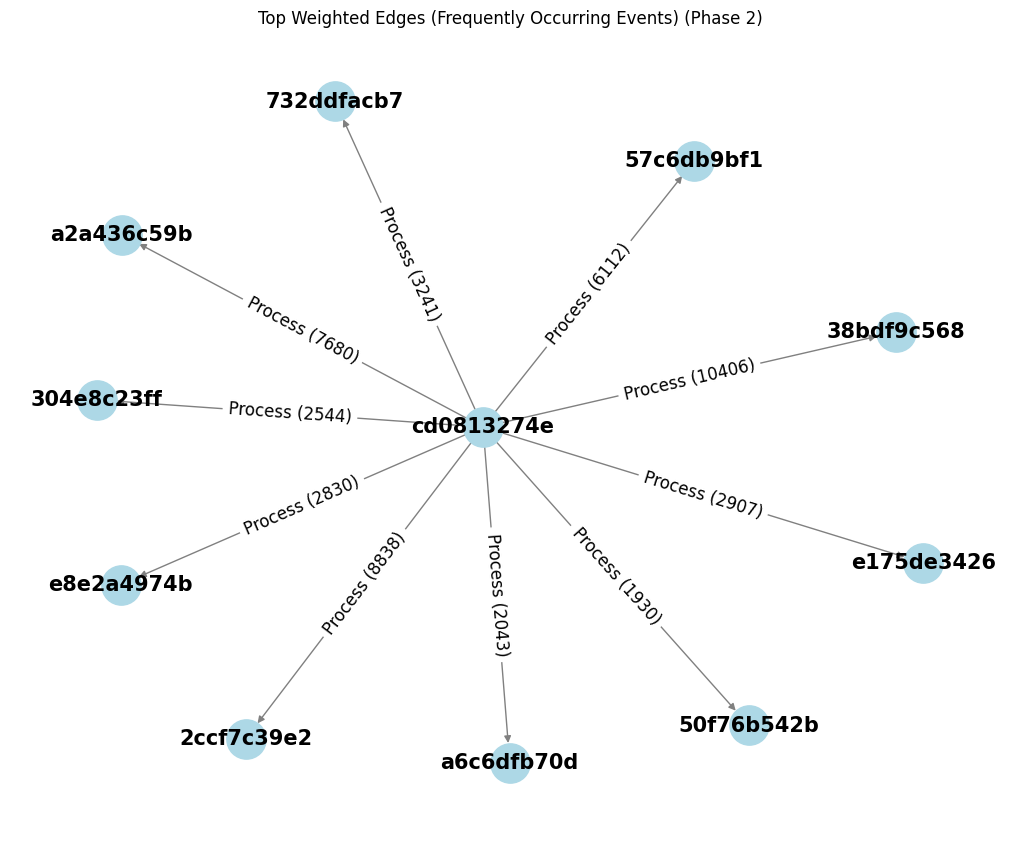

In [73]:
G = nx.DiGraph()
for u, v, d in high_weight_edges:
    G.add_edge(u, v, weight=d['weight'], event_type=d['event_type'])

# Generate positions for the nodes
pos = nx.spring_layout(G, seed=42)

# Shorten node labels
shorten_labels = {node: node[:10] for node in G.nodes()}

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, labels=shorten_labels, with_labels=True, node_color="lightblue",
    edge_color="gray", node_size=800, font_size=15, font_weight="bold"
)

# Add edge labels to show both weight and type
edge_labels = {
    (u, v): f"{d['event_type']} ({d['weight']})"
    for u, v, d in G.edges(data=True)
}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Top Weighted Edges (Frequently Occurring Events) (Phase 2)")
plt.show()

In [70]:
in_degree = G.in_degree('cd0813274ef046cf6ef72a2349f2bef3')
out_degree = G.out_degree('cd0813274ef046cf6ef72a2349f2bef3')
print(f"In-degree: {in_degree}, Out-degree: {out_degree}")

In-degree: [], Out-degree: []


In [189]:
# Get all outgoing edges from the node
outgoing_edges = G.out_edges('cd0813274ef046cf6ef72a2349f2bef3', data=True)

# Print the details of each outgoing edge
for source, target, attributes in outgoing_edges:
    print(f"Source: {source}, Target: {target}, Attributes: {attributes}")

Source: cd0813274ef046cf6ef72a2349f2bef3, Target: b6441fae5a5a024965680beb6d251f68, Attributes: {'weight': 6, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 75d1418516143ca44cab643505326a9c, Attributes: {'weight': 4, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 7c525651c4801d23b948d9cada3c8f4c, Attributes: {'weight': 10, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: d51c8a3250c7649344489f94e445d666, Attributes: {'weight': 28, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: bec99b854dce1b9da3042f825517036d, Attributes: {'weight': 48, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: b9baf460c7e79c56885b77d52e43e06c, Attributes: {'weight': 64, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target: 304e8c23ffe33caba5c289e76ce14344, Attributes: {'weight': 5088, 'event_type': 'Process'}
Source: cd0813274ef046cf6ef72a2349f2bef3, Target

In [190]:
from collections import Counter

interaction_types = [attributes['event_type'] for _, _, attributes in outgoing_edges]
interaction_counts = Counter(interaction_types)
print("Interaction counts:", interaction_counts)

Interaction counts: Counter({'Process': 85})


In [191]:
used_edges = [(source, target, attributes) for source, target, attributes in outgoing_edges if attributes['event_type'] == 'Used']
print("Edges with 'Used' interaction:", used_edges)

Edges with 'Used' interaction: []


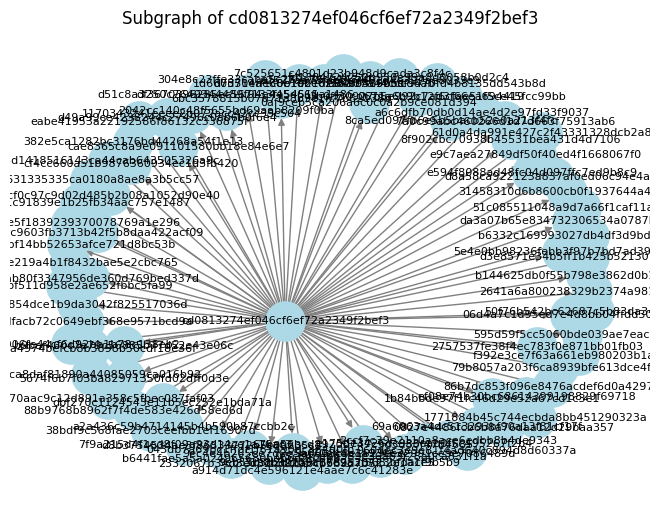

In [192]:
neighbors = list(G.successors('cd0813274ef046cf6ef72a2349f2bef3'))
subgraph = G.subgraph(neighbors + ['cd0813274ef046cf6ef72a2349f2bef3'])
nx.draw(subgraph, with_labels=True, node_color="lightblue", edge_color="gray", node_size=800, font_size=8)
plt.title("Subgraph of cd0813274ef046cf6ef72a2349f2bef3")
plt.show()

In [199]:
for _, target, attributes in outgoing_edges:
    print(f"Target: {target}, Event Type: {attributes.get('event_type')}, Weight: {attributes.get('weight')}")

Target: b6441fae5a5a024965680beb6d251f68, Event Type: Process, Weight: 6
Target: 75d1418516143ca44cab643505326a9c, Event Type: Process, Weight: 4
Target: 7c525651c4801d23b948d9cada3c8f4c, Event Type: Process, Weight: 10
Target: d51c8a3250c7649344489f94e445d666, Event Type: Process, Weight: 28
Target: bec99b854dce1b9da3042f825517036d, Event Type: Process, Weight: 48
Target: b9baf460c7e79c56885b77d52e43e06c, Event Type: Process, Weight: 64
Target: 304e8c23ffe33caba5c289e76ce14344, Event Type: Process, Weight: 5088
Target: 960dec3e9e81f4ad640c894d8d60337a, Event Type: Process, Weight: 614
Target: 51c085511048a9d7a66f1caf11a0d22c, Event Type: Process, Weight: 1576
Target: d7d51eae88e1abe625aa07a44cccd6ab, Event Type: Process, Weight: 516
Target: 0af9ceb5ca206a6c0c0a2b9ce081d394, Event Type: Process, Weight: 1904
Target: 31458310d6b8600cb0f1937644a47b5f, Event Type: Process, Weight: 1814
Target: 1771884b45c744ecbda8bb451290323a, Event Type: Process, Weight: 156
Target: 7f9a215d4f1ed8f09a93d

In [29]:
degrees = [G.out_degree(n) for n in G.nodes]
print(f"Out-degree of cd0813274ef046cf6ef72a2349f2bef3: {G.out_degree('cd0813274ef046cf6ef72a2349f2bef3')}")
print(f"Average out-degree: {sum(degrees) / len(degrees)}")

Out-degree of cd0813274ef046cf6ef72a2349f2bef3: 85
Average out-degree: 1.413973651615809


### Differences Between Both Phases

In [30]:
df_benign = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:40]
df_attack = pd.read_csv("Phase2_Provenance_Cleaned.csv", low_memory = False)[0:40]


G_benign = nx.DiGraph()
G_attack = nx.DiGraph()


def build_graph(df, G):
    for _, row in df.iterrows():
        src, tgt, event = row["from"], row["to"], row["type"]
        if G.has_edge(src, tgt):
            G[src][tgt]["weight"] += 1
        else:
            G.add_edge(src, tgt, weight=1, event_type=event)
    return G

# Build graphs for each phase
G_benign = build_graph(df_benign, G_benign)
G_attack = build_graph(df_attack, G_attack)

In [31]:
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)

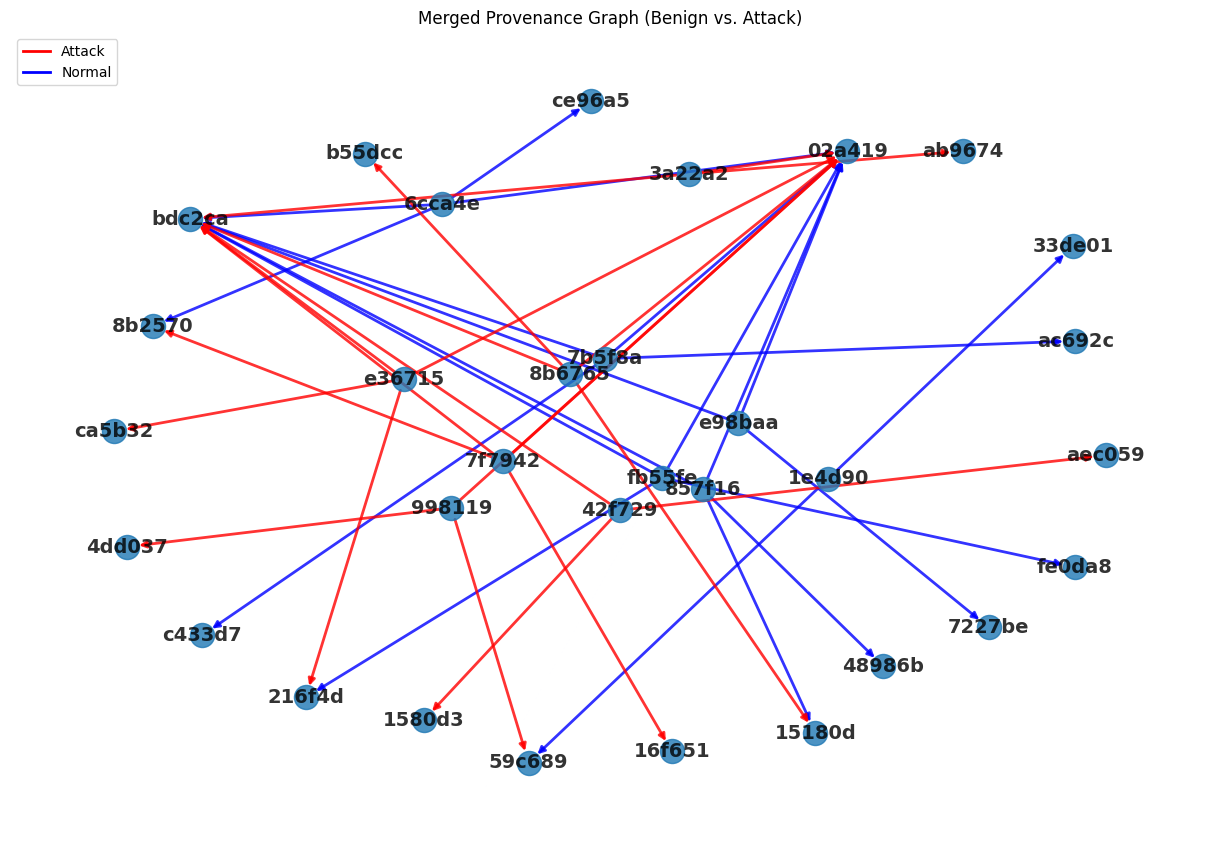

In [39]:
import matplotlib.pyplot as plt


G_combined = nx.DiGraph()





for G, label in [(G_benign, "benign"), (G_attack, "attack")]:
    for u, v, d in G.edges(data=True):
        if G_combined.has_edge(u, v):
            G_combined[u][v]["weight"] += d["weight"]
        else:
            G_combined.add_edge(u, v, weight=d["weight"], phase=label)


edge_colors = ["red" if G_combined[u][v]["phase"] == "attack" else "blue" for u, v in G_combined.edges()]


plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G_combined, seed = 42)

shorten_labels = {node : node[:6] for node in G_combined.nodes()}

nx.draw(G_combined, pos, labels = shorten_labels, with_labels=True, edge_color=edge_colors,width=2, alpha=0.8, font_weight = "bold", font_size = "14")

from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="red", lw=2, label="Attack"),
    Line2D([0], [0], color="blue", lw=2, label="Normal"),
]

plt.title("Merged Provenance Graph (Benign vs. Attack)")
plt.legend(handles = legend_elements, loc="upper left")

plt.show()


### Timeline Graph

{('7b5f8ad90ec4544e537cc1fe806f3f09',
  'ac692c8152ff756ee90c08b4f03aa1b0d'): Text(0.3468106991772628, 0.19764704065374472, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  'c433d73e1b5e7bc767877f935fa88e3b'): Text(-0.4543047517932294, -0.25810542959484084, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  'bdc2ca1d94be5a3958f6621d8b52fdb0'): Text(-0.5799013226000775, 0.34088139761061087, '2023-12-01 22:13:45.766999960'),
 ('7b5f8ad90ec4544e537cc1fe806f3f09',
  '02a4195a9866b7c9eba7405c13110dad'): Text(0.04701888061824788, 0.5625946395659651, '2023-12-01 22:13:45.766999960'),
 ('fb55fe798e57582783da0605490799af',
  'fe0da82d22e5d7e9a0d14c5b72206a8b'): Text(0.40066321474323496, -0.5632062485151839, '2023-12-01 22:13:45.786999941')}

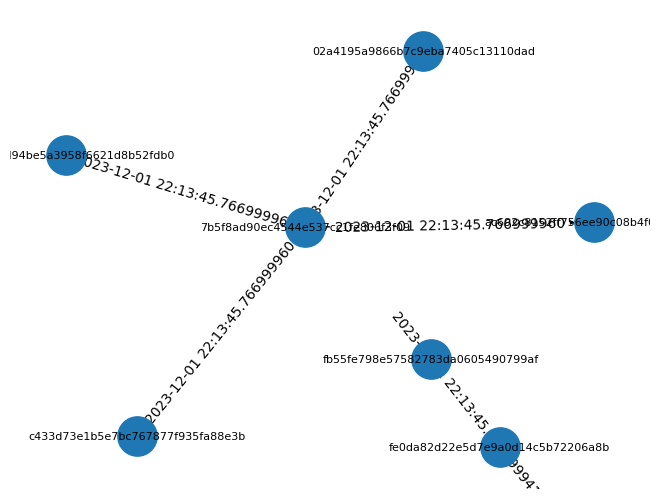

In [242]:
import networkx as nx

#see the sequence of events over time 
#conver to readable time first
#df_combined['time'] = pd.to_datetime(df['time'], unit='s')
df_time_sorted = df_combined.sort_values(by ="time")[0:5]

G = nx.DiGraph()
for  _, row in df_time_sorted.iterrows():
    G.add_edge(row['from'], row['to'], label = row['type'], time= row['time'])
    
pos = nx.spring_layout(G, seed = 42)
nx.draw(G, pos, with_labels = True, node_size = 800, font_size = 8)
edge_labels = nx.get_edge_attributes(G, "time")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    





In [200]:
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)
attack_only_edges

[('7f79425151c99537a3aa20b3b9c5f936', '16f651a1c01dab77dbc303b03b73acb2'),
 ('7f79425151c99537a3aa20b3b9c5f936', '02a4195a9866b7c9eba7405c13110dad'),
 ('8b6765b85687fc106c38efdd4a400f5f', '15180ddb518d16356e87e7c20093580a'),
 ('7f79425151c99537a3aa20b3b9c5f936', '8b2570bd7e5138cc8a48551559fee11c'),
 ('8b6765b85687fc106c38efdd4a400f5f', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'ab96744eae92194b85b308c92cf37130'),
 ('e36715b62c8cdc32e47483b3600712f1', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('998119880cb22df8c0895f70d3881a4f', '4dd037f1d854d7177a34ddfbb2cc2fa7'),
 ('3a22a2e9f1f6905299186a52e8b7d339', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('e36715b62c8cdc32e47483b3600712f1', '216f4d4893942a66d649c4e02b5722c4'),
 ('e36715b62c8cdc32e47483b3600712f1', 'ca5b322fa4d4cb63aa5dd9fbd88e37e4'),
 ('7f79425151c99537a3aa20b3b9c5f936', 'bdc2ca1d94be5a3958f6621d8b52fdb0'),
 ('8b6765b85687fc106c38efdd4a400f5f', '02a4195a9866b7c9eba7405c13110dad'),
 ('e36715b62c8cdc32e47483

### Attack anomalies

In [27]:
df_benign = pd.read_csv("Phase1_Provenance_Cleaned.csv")[0:50]
df_attack = pd.read_csv("Phase2_Provenance_Cleaned.csv", low_memory = False)[0:50]


G_benign = nx.DiGraph()
G_attack = nx.DiGraph()


def build_graph(df, G):
    for _, row in df.iterrows():
        src, tgt, event = row["from"], row["to"], row["type"]
        if G.has_edge(src, tgt):
            G[src][tgt]["weight"] += 1
        else:
            G.add_edge(src, tgt, weight=1, event_type=event)
    return G

# Build graphs for each phase
G_benign = build_graph(df_benign, G_benign)
G_attack = build_graph(df_attack, G_attack)

In [283]:
# Attack only edge
attack_only_edges = set(G_attack.edges()) - set(G_benign.edges())
attack_only_edges = list(attack_only_edges)

#attack only rows
attack_only_rows = df[df.apply(lambda row  : (row['from'], row['to']) in attack_only_edges, axis = 1)]

attack_only_rows



id            type  \
0   ca5b322fa4d4cb63aa5dd9fbd88e37e4         Process   
1   e36715b62c8cdc32e47483b3600712f1         Process   
2   e36715b62c8cdc32e47483b3600712f1  WasTriggeredBy   
3   216f4d4893942a66d649c4e02b5722c4        Artifact   
4   216f4d4893942a66d649c4e02b5722c4            Used   
5   bdc2ca1d94be5a3958f6621d8b52fdb0        Artifact   
6   bdc2ca1d94be5a3958f6621d8b52fdb0            Used   
7   02a4195a9866b7c9eba7405c13110dad        Artifact   
8   02a4195a9866b7c9eba7405c13110dad            Used   
9   b55dcc91b1270f16cef024e045a3aa76         Process   
10  8b6765b85687fc106c38efdd4a400f5f         Process   
11  8b6765b85687fc106c38efdd4a400f5f  WasTriggeredBy   
12  15180ddb518d16356e87e7c20093580a        Artifact   
13  15180ddb518d16356e87e7c20093580a            Used   
14  15180ddb518d16356e87e7c20093580a            Used   
15  15180ddb518d16356e87e7c20093580a            Used   
16  16f651a1c01dab77dbc303b03b73acb2         Process   
17  7f79425151c99537a3aa20b3b9c5f936         Process   
18  7f79425151c99537a3aa20b3b9c5f936  WasTriggeredBy   
19  8b2570bd7e5138cc8a48551559fee11c        Artifact   
20  8b2570bd7e5138cc8a48551559fee11c            Used   
21  8b2570bd7e5138cc8a48551559fee11c            Used   
22  8b2570bd7e5138cc8a48551559fee11c            Used   
23  ab96744eae92194b85b308c92cf37130         Process   
24  3a22a2e9f1f6905299186a52e8b7d339         Process   
25  3a22a2e9f1f6905299186a52e8b7d339  WasTriggeredBy   
26  3a22a2e9f1f6905299186a52e8b7d339            Used   
27  3a22a2e9f1f6905299186a52e8b7d339            Used   
28  4dd037f1d854d7177a34ddfbb2cc2fa7         Process   
29  998119880cb22df8c0895f70d3881a4f         Process   
30  998119880cb22df8c0895f70d3881a4f  WasTriggeredBy   
31  59c68989220445a20565e180f39ff656        Artifact   
32  59c68989220445a20565e180f39ff656            Used   
33  59c68989220445a20565e180f39ff656            Used   
34  1580d331bb84cac93bd48f1f2df436de         Process   
35  42f72959cdd964cca2d73105a422b974         Process   
36  42f72959cdd964cca2d73105a422b974  WasTriggeredBy   
37  aec05964d2cf90e72554c6862abfc1bd        Artifact   
38  aec05964d2cf90e72554c6862abfc1bd            Used   
39  aec05964d2cf90e72554c6862abfc1bd            Used   
40  aec05964d2cf90e72554c6862abfc1bd            Used   
41  a6c202f48cd1aa9690275aaaad15cdad         Process   
42  ceb0e71ab1688d31dd8e2c1f08734f5a         Process   
43  ceb0e71ab1688d31dd8e2c1f08734f5a  WasTriggeredBy   
44  c433d73e1b5e7bc767877f935fa88e3b        Artifact   
45  c433d73e1b5e7bc767877f935fa88e3b            Used   
46  c433d73e1b5e7bc767877f935fa88e3b            Used   
47  c433d73e1b5e7bc767877f935fa88e3b            Used   
48  967fb520af5b1eab0ef360b30df3bce6         Process   
49  5eb47398c9540bb438287336d847f0e8         Process   
50  5eb47398c9540bb438287336d847f0e8  WasTriggeredBy   

                                from                                to  uid  \
0   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  0.0   
1   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  0.0   
2   e36715b62c8cdc32e47483b3600712f1  ca5b322fa4d4cb63aa5dd9fbd88e37e4  NaN   
3   e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4  NaN   
4   e36715b62c8cdc32e47483b3600712f1  216f4d4893942a66d649c4e02b5722c4  NaN   
5   e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   
6   e36715b62c8cdc32e47483b3600712f1  bdc2ca1d94be5a3958f6621d8b52fdb0  NaN   
7   e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
8   e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
9   8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  0.0   
10  8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  0.0   
11  8b6765b85687fc106c38efdd4a400f5f  b55dcc91b1270f16cef024e045a3aa76  NaN   
12  8b6765b85687fc106c38efdd4a400f5f  15180ddb518d16356e87e7c20093580a  NaN   
13  8b6765b8568

In [284]:
#Event type for Attack only Edges:

attack_event_type_counts = attack_only_rows['type'].value_counts()

print("Event type counts for attack-only edges:")
print(attack_event_type_counts)

Event type counts for attack-only edges:
type
Used              19
Process           16
WasTriggeredBy     8
Artifact           8
Name: count, dtype: int64


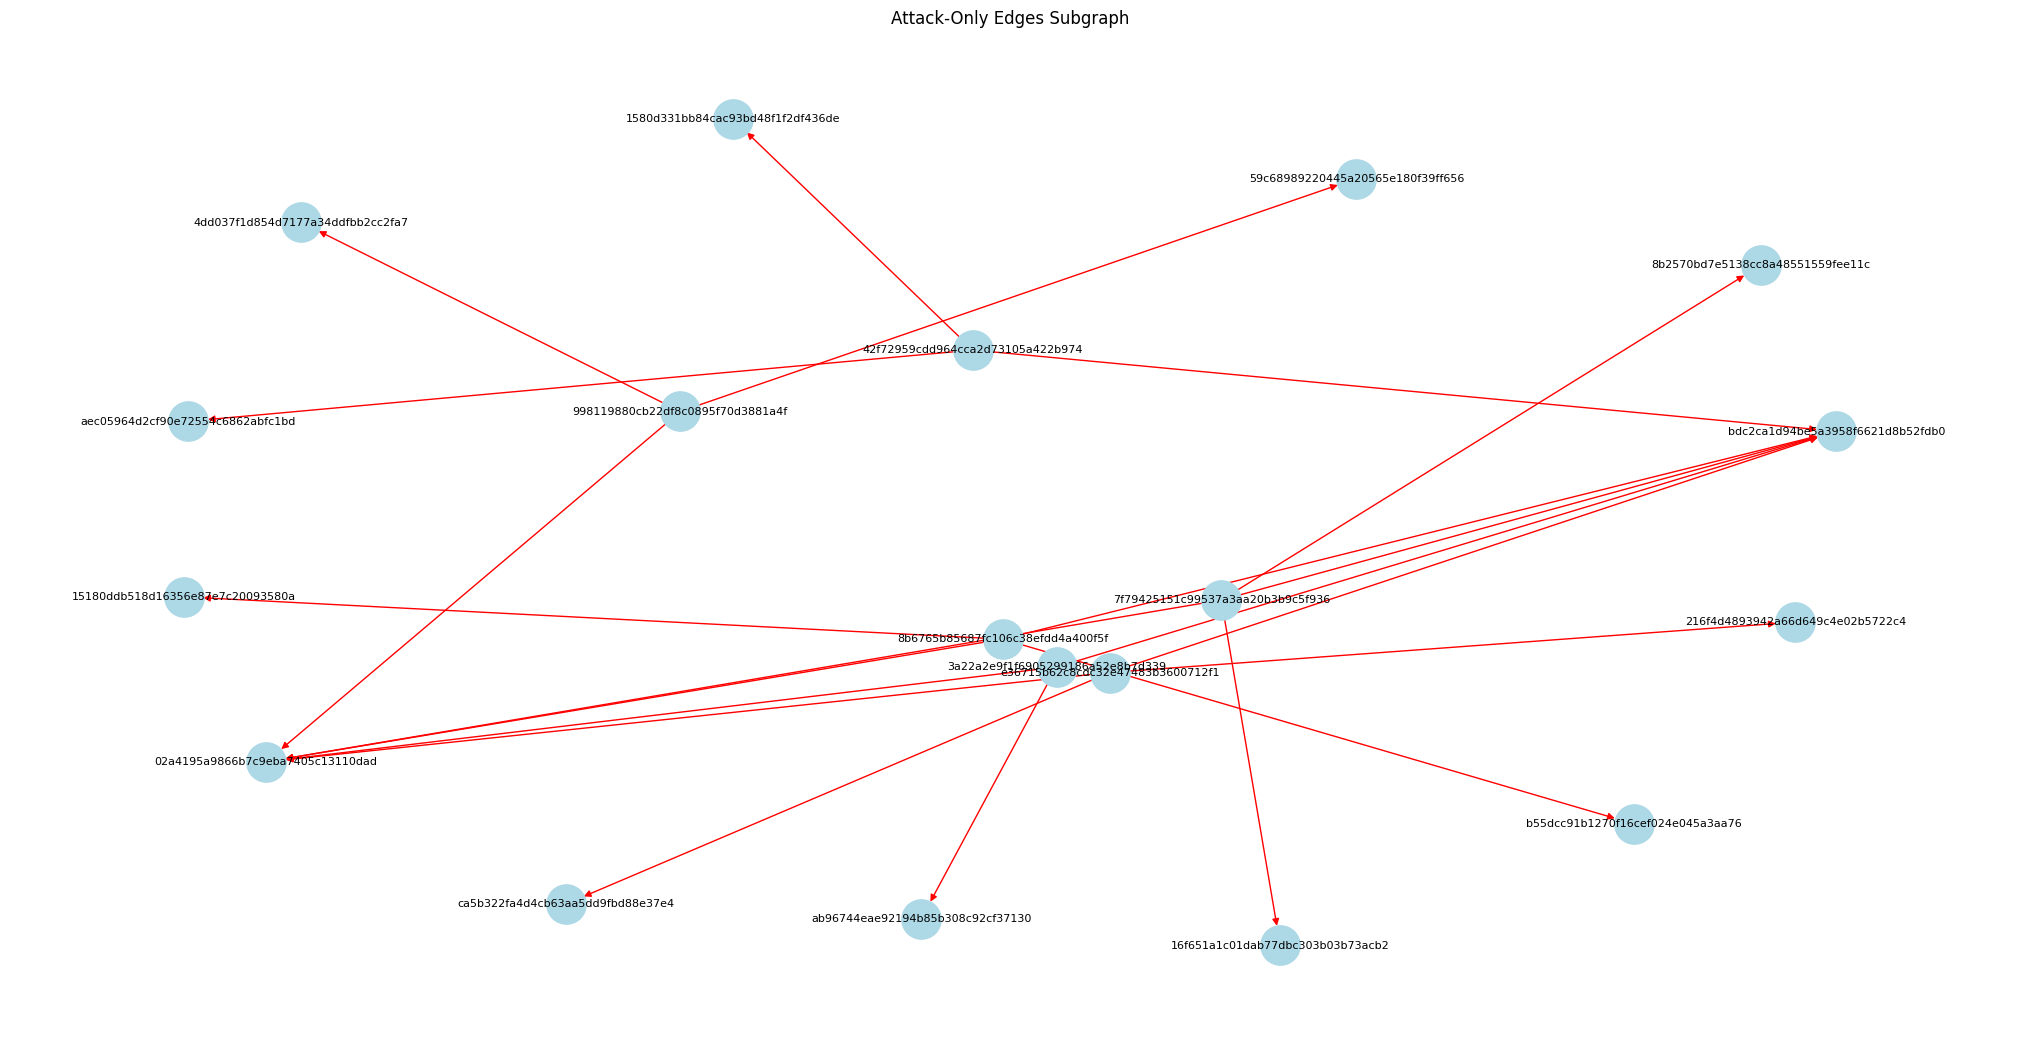

In [90]:
#visualzing the attak-only edges:

G_attack = nx.DiGraph()
G_attack.add_edges_from(attack_only_edges)

pos = nx.spring_layout(G_attack, seed=42)
plt.figure(figsize=(20, 10))
nx.draw(G_attack, pos, with_labels=True, node_color="lightblue", edge_color="red", node_size=800, font_size=8)
plt.title("Attack-Only Edges Subgraph")
plt.show()

In [240]:
df_attack[df_attack['id'] == '02a4195a9866b7c9eba7405c13110dad'] # Critical target for resources

id      type  \
7  02a4195a9866b7c9eba7405c13110dad  Artifact   
8  02a4195a9866b7c9eba7405c13110dad      Used   

                               from                                to  uid  \
7  e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   
8  e36715b62c8cdc32e47483b3600712f1  02a4195a9866b7c9eba7405c13110dad  NaN   

   egid  exe  gid  euid name  ...  local address  remote port protocol  \
7   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   
8   NaN  NaN  NaN   NaN  NaN  ...            NaN          NaN      NaN   

   remote address local port  tgid  fd  mode label subLabel  
7             NaN        NaN   NaN NaN   NaN     0        0  
8             NaN        NaN   NaN NaN   NaN     0        0  

[2 rows x 35 columns]

### Event-Type-Based Subgraph

{('e36715b62c8cdc32e47483b3600712f1',
  'ca5b322fa4d4cb63aa5dd9fbd88e37e4'): Text(0.7188645955406985, 0.3368499193070209, 'WasTriggeredBy'),
 ('8b6765b85687fc106c38efdd4a400f5f',
  'b55dcc91b1270f16cef024e045a3aa76'): Text(-0.8693882515745874, 0.3768784881462186, 'WasTriggeredBy'),
 ('7f79425151c99537a3aa20b3b9c5f936',
  '16f651a1c01dab77dbc303b03b73acb2'): Text(-0.6208475608251316, 0.7361744028992816, 'WasTriggeredBy'),
 ('3a22a2e9f1f6905299186a52e8b7d339',
  'ab96744eae92194b85b308c92cf37130'): Text(-0.7450883898064259, -0.49659990118552666, 'WasTriggeredBy'),
 ('998119880cb22df8c0895f70d3881a4f',
  '4dd037f1d854d7177a34ddfbb2cc2fa7'): Text(-0.4717150414948368, -0.714342973304862, 'WasTriggeredBy'),
 ('42f72959cdd964cca2d73105a422b974',
  '1580d331bb84cac93bd48f1f2df436de'): Text(-0.8277587060335929, -0.32885688617800723, 'WasTriggeredBy'),
 ('ceb0e71ab1688d31dd8e2c1f08734f5a',
  'a6c202f48cd1aa9690275aaaad15cdad'): Text(-0.9101924976381375, 0.08768193951605818, 'WasTriggeredBy'),
 (

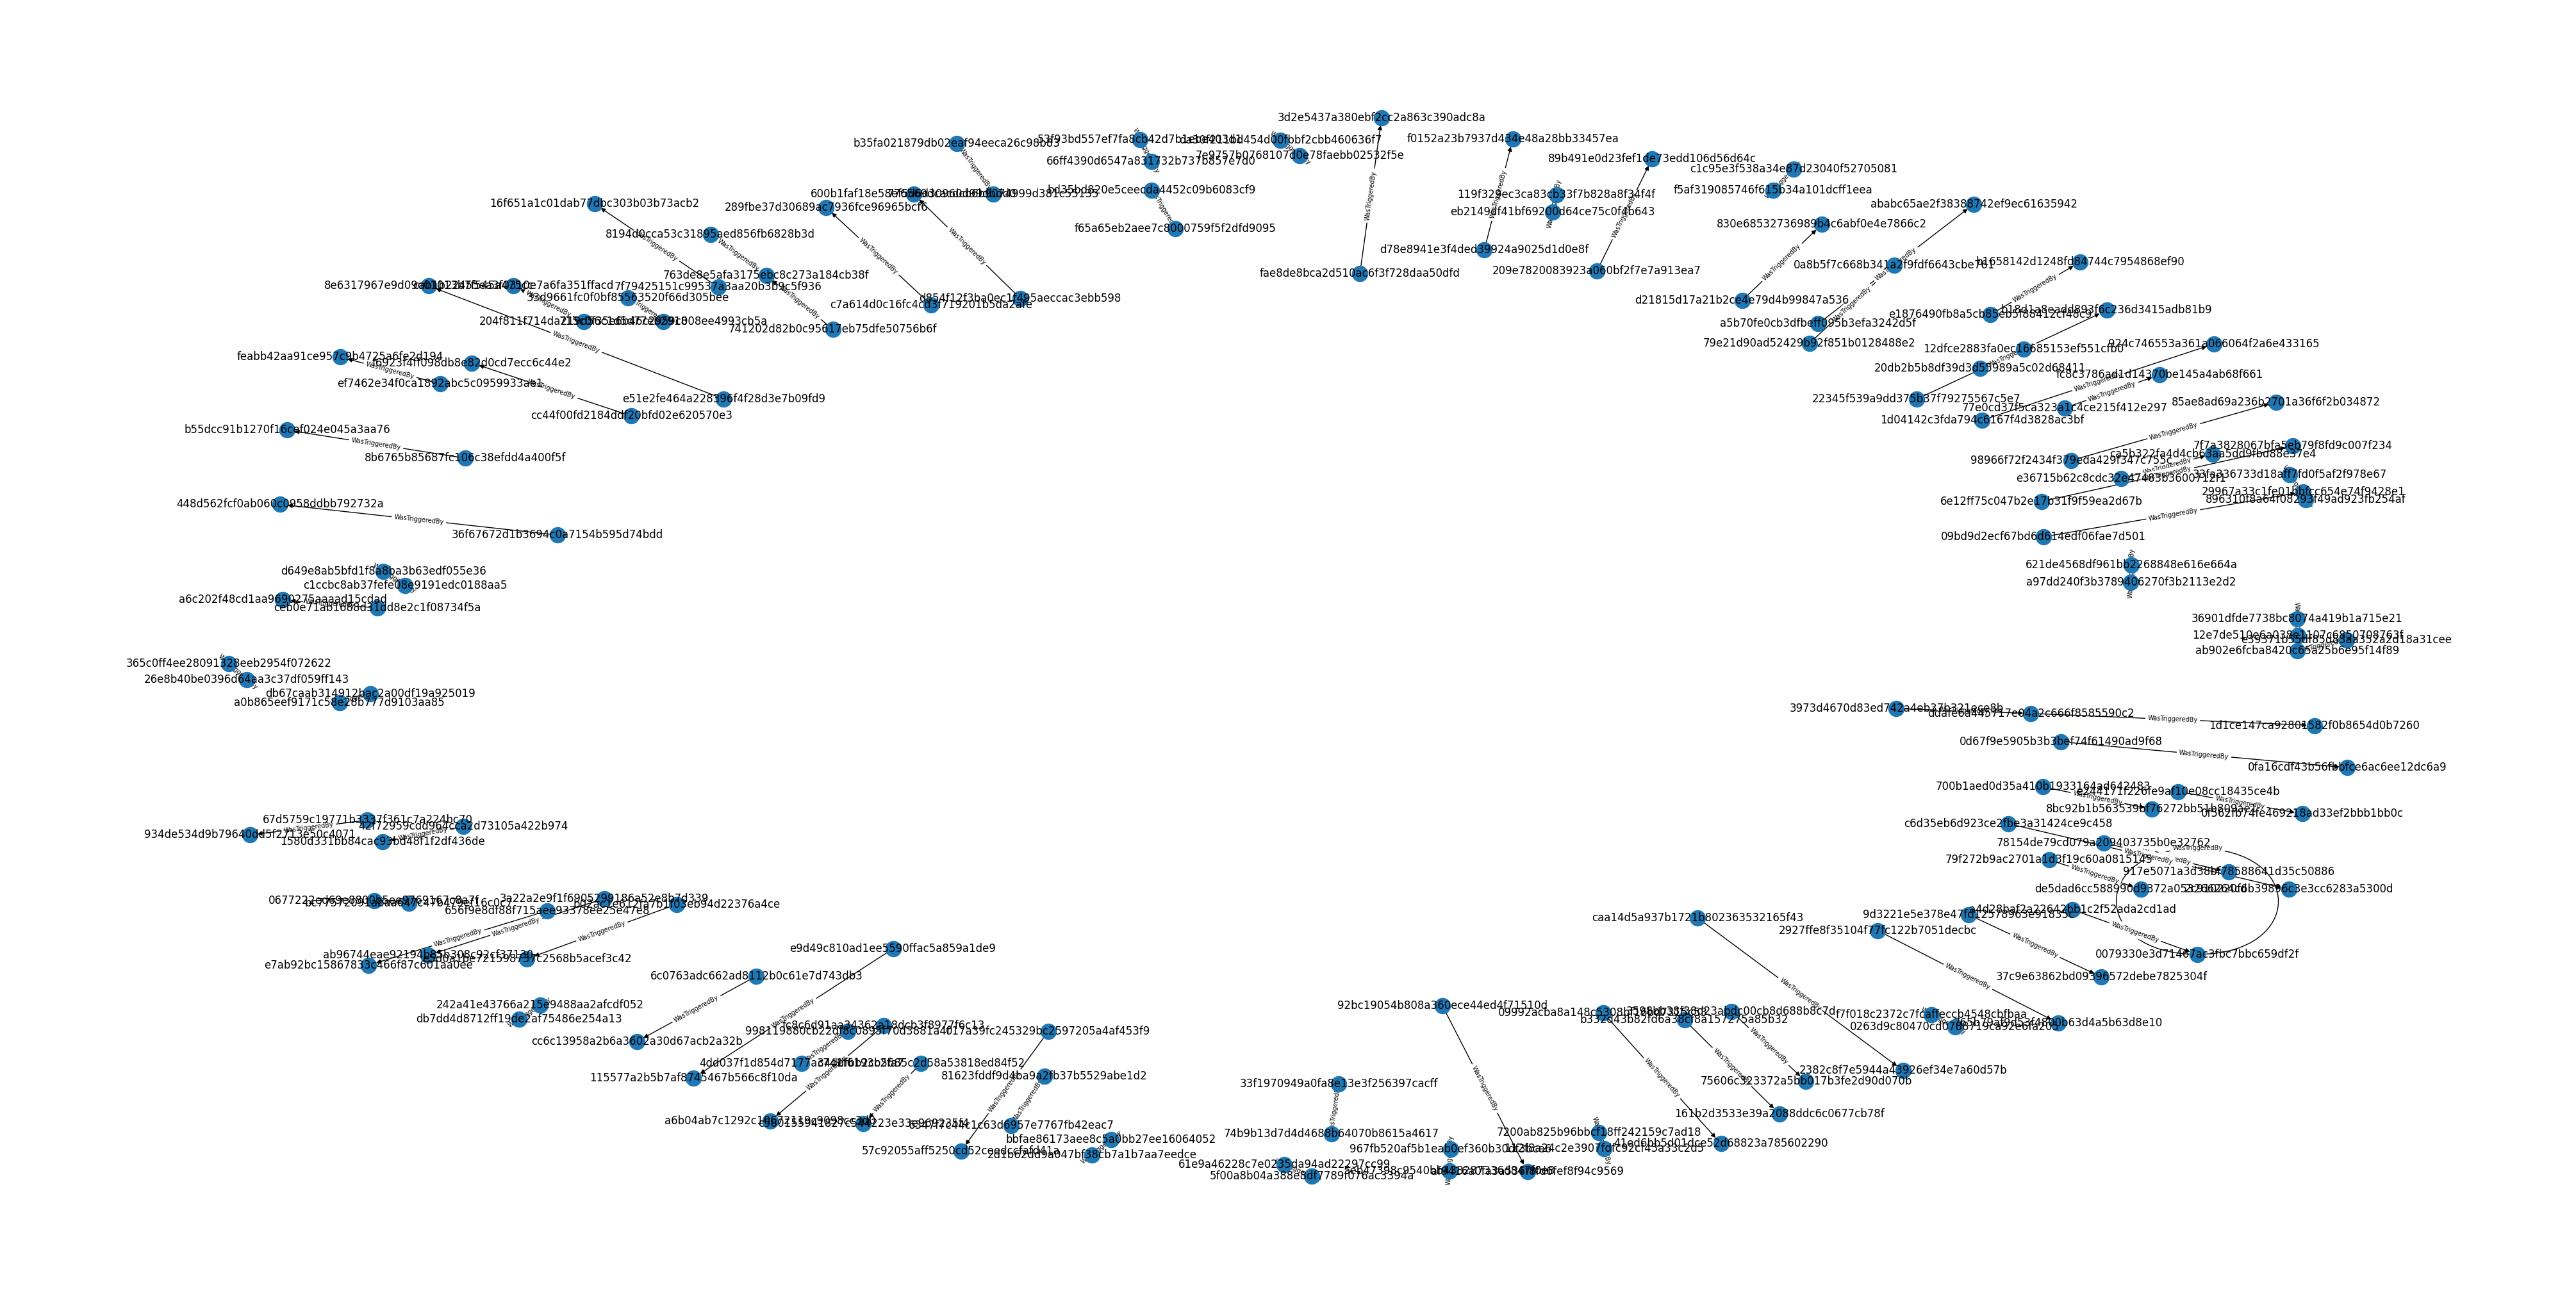

In [97]:
event  = 'WasTriggeredBy'

df = pd.read_csv('Phase2_Provenance_Cleaned.csv', low_memory= False)[0:500]
G = nx.DiGraph()

plt.figure(figsize=(40, 20))


for _, row in df.iterrows():
    G.add_edge(row["from"], row["to"], label=row["type"]) 

H  = nx.DiGraph()
for u, v, d in G.edges(data = True):
    if d['label'] == event:
        H.add_edge(u, v , label=d["label"])
        


    
pos = nx.spring_layout(H, seed = 42)

nx.draw(H, pos, with_labels=True, node_size = 300)
edge_labels = nx.get_edge_attributes(H, "label")


nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels, font_size=7)

### Process Name Distribution

In [52]:
unique_process = df_attack[df_attack['type']  == 'Process']['name'].unique()[0:10]

final_dict = {}
for i in df_attack['name']:
   for j in unique_process:
       if i == j:
           count = df_attack[df_attack['name'] == i]['name'].count()
           final_dict[i] = count
           
      

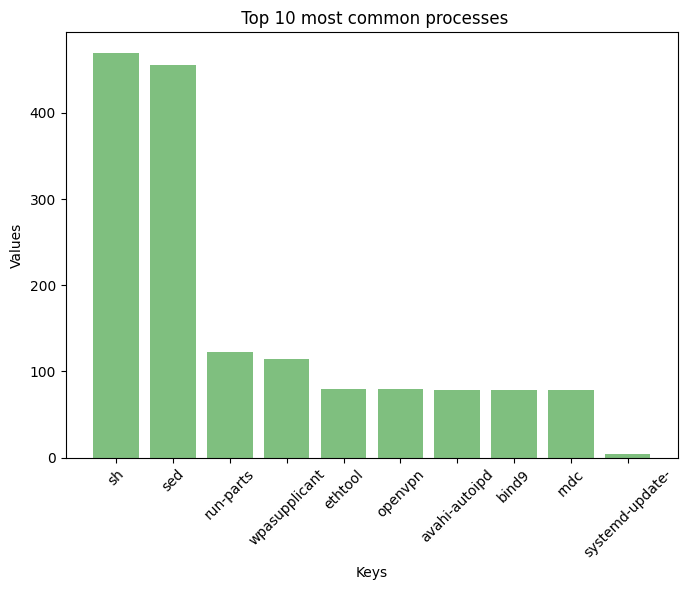

In [53]:
top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True)[:10])

plt.figure(figsize=(7, 6))
plt.bar(top_10.keys(), top_10.values(), color='green', alpha=0.5)
plt.xlabel("Keys")
plt.ylabel("Values")
plt.title(" Top 10 most common processes")
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

### Processs exe Distribution

In [54]:
unique_process = df_attack[df_attack['type']  == 'Process']['exe'].unique()[0:10]

final_dict = {}
for i in df_attack['exe']:
   for j in unique_process:
       if i == j:
           count = df_attack[df_attack['exe'] == i]['exe'].count()
           final_dict[i] = count

In [48]:
final_dict

{'/usr/bin/dash': np.int64(2026),
 '/usr/bin/run-parts': np.int64(122),
 '/usr/sbin/rndc': np.int64(78),
 '/usr/bin/sed': np.int64(456),
 '/usr/lib/systemd/systemd-update-utmp': np.int64(4),
 '/usr/bin/grep': np.int64(331),
 '/usr/lib/systemd/systemd-timesyncd': np.int64(1),
 '/usr/bin/systemd-detect-virt': np.int64(44),
 '/usr/bin/python3.8': np.int64(600),
 '/snap/snapd/20290/usr/lib/snapd/apparmor_parser': np.int64(18)}

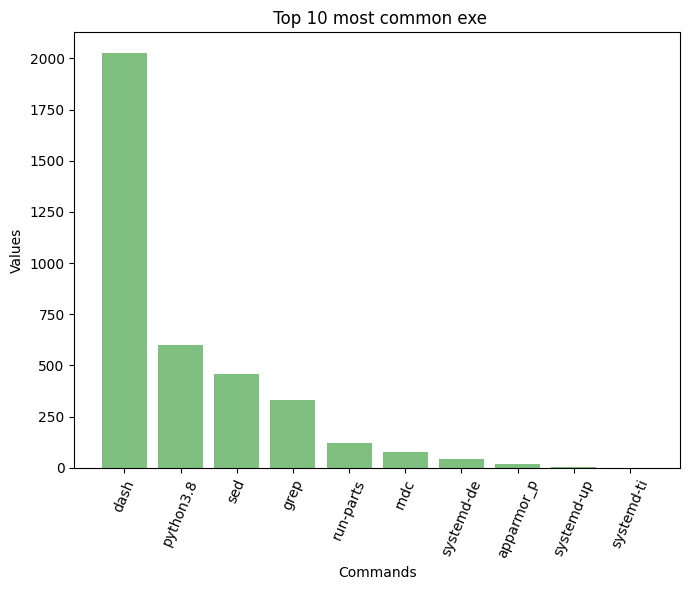

In [58]:


top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))
shortened_top_10 = {os.path.basename(k)[:10]: v for k, v in top_10.items()}

plt.figure(figsize=(7, 6))
plt.bar(shortened_top_10.keys(), shortened_top_10.values(), color='green', alpha=0.5)
plt.xlabel("Commands")
plt.ylabel("Values")
plt.title(" Top 10 most common exe")
plt.xticks(rotation=67)  
plt.tight_layout()  
plt.show()

In [57]:
shortened_top_10 = {os.path.basename(k)[:10]: v for k, v in top_10.items()}
shortened_top_10

{'dash': np.int64(2026),
 'python3.8': np.int64(600),
 'sed': np.int64(456),
 'grep': np.int64(331),
 'run-parts': np.int64(122),
 'rndc': np.int64(78),
 'systemd-de': np.int64(44),
 'apparmor_p': np.int64(18),
 'systemd-up': np.int64(4),
 'systemd-ti': np.int64(1)}

In [152]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['permissions'].unique()

final_dict = {permission: df_attack[df_attack['permissions'] == permission]['permissions'].count() for permission in unique_path}


In [153]:
final_dict

{np.float64(755.0): np.int64(292),
 np.float64(664.0): np.int64(8421),
 np.float64(nan): np.int64(0),
 np.float64(640.0): np.int64(2),
 np.float64(644.0): np.int64(34),
 np.float64(4755.0): np.int64(7),
 np.float64(777.0): np.int64(283),
 np.float64(6755.0): np.int64(4),
 np.float64(700.0): np.int64(4),
 np.float64(600.0): np.int64(8589),
 np.float64(775.0): np.int64(2),
 np.float64(440.0): np.int64(2),
 np.float64(660.0): np.int64(2)}

### Artifact Subtype

In [44]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['subtype'].unique()

final_dict = {permission: df_attack[df_attack['subtype'] == permission]['subtype'].count() for permission in unique_path}

In [45]:
final_dict

{'file': np.int64(17344),
 'network socket': np.int64(10787),
 'directory': np.int64(15),
 'link': np.int64(283),
 'unknown': np.int64(18)}

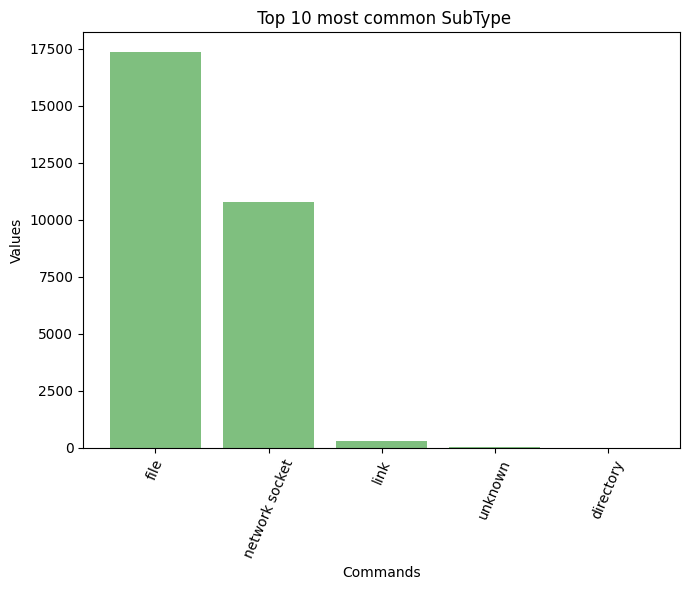

In [46]:
top_10 = dict(sorted(final_dict.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(7, 6))
plt.bar(top_10.keys(), top_10.values(), color='green', alpha=0.5)
plt.xlabel("Commands")
plt.ylabel("Values")
plt.title(" Top 10 most common SubType")
plt.xticks(rotation=67)  
plt.tight_layout()  
plt.show()

In [160]:
unique_path = df_attack[df_attack['type'] == 'Artifact']['permissions'].unique()